# **Case Study**

The Akahappa Company specializes in ready-to-eat meals. The company operates a three-tier supply chain with a factory, warehouses, and retailers. Akahappa delivers directly to the warehouses of its two largest distributors. The sales department records sales on a daily basis, which are then used by the operations
department for developing forecasts used for planning purposes.

Since many consumers will switch to the competitor’s brands if product is out-of-stock, underforecasting results in lost sales. On the other hand, overforecasting results in excess inventory, which becomes obsolete and has to be destroyed because of the perishable characteristics of the products. Therefore, producing an accurate forecast is very important.

The company has decided to develop new forecasting models for curry, which is one of the most valuable product categories of the company. The company produces two kinds of curry: green thai curry and vegetable korma curry. The warehouse records sales on a daily basis but only days with sales are reported.
You are given 9 years of sales data.

You are given two sets of data: the historical demand data of green thai curry (DA) and korma curry (DB). Carry out steps 1 to 6.

### **Libraries**

In [ ]:
#Import basic Libraries
import io
import pandas as pd
import numpy as np
from numpy import loadtxt
import scipy as sci
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler # found in the scikit-learn package

from keras.layers import Dense
from keras.layers import LSTM
#from keras.optimizers import SGD
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam # - Works

import tensorflow as tf
from tensorflow.keras.models import Sequential
##from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Outliers section
!pip install hampel
from hampel import hampel
from sklearn.cluster import DBSCAN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import and Arrange Data**

In [ ]:
# Read the CSV file, store it as a DataFrame and make sure it has no NaN values
# Vegetable Curry
url_vc='https://drive.google.com/file/d/1Yd4OcWul48u2RLakt3CfmFAs7hrSSVCE/view?usp=sharing'
path_vc ='https://drive.google.com/uc?id=' + url_vc.split('/')[-2]
df_vc = pd.read_csv(path_vc)
print(df_vc.head(3))

# Green Curry
url_gc='https://drive.google.com/file/d/1YXz_BBT83XPFmQgCoIAuY4MCCsz3ohhj/view?usp=sharing'
path_gc ='https://drive.google.com/uc?id=' + url_gc.split('/')[-2]
df_gc = pd.read_csv(path_gc)
print(df_gc.head(3))

# Make sure that there are no NaN values present
print("\n")
print(f"Vegetable Curry")
print(df_vc.info())
print("\n")
print(f"Green Curry")
print(df_vc.info())

       Date  Sales
0  1/1/2011    208
1  1/2/2011    240
2  1/3/2011    206
       Date  Sales
0  1/1/2011    366
1  1/2/2011    301
2  1/3/2011    309


Vegetable Curry
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3650 non-null   object
 1   Sales   3650 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.2+ KB
None


Green Curry
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3650 non-null   object
 1   Sales   3650 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.2+ KB
None


### **Outliers**

#### Green curry

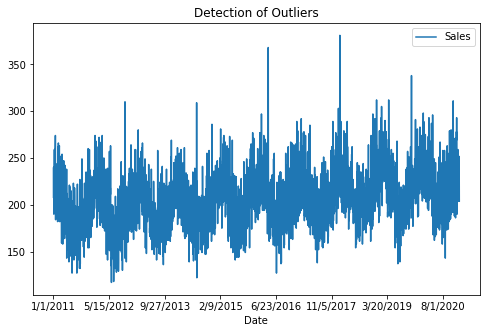

In [ ]:
#Plot the data to find Outliers
df_gc.plot(x='Date',y='Sales',kind='line',figsize=(8,5),title='Detection of Outliers')

##### **Hampel**

* https://medium.com/wwblog/clean-up-your-time-series-data-with-a-hampel-filter-58b0bb3ebb04
* https://pypi.org/project/hampel/

Outlier Indices:  [68, 77, 118, 119, 215, 269, 276, 309, 403, 416, 441, 471, 499, 503, 554, 557, 602, 623, 624, 643, 699, 715, 721, 768, 856, 900, 901, 927, 937, 973, 1016, 1024, 1101, 1184, 1213, 1271, 1287, 1336, 1368, 1399, 1417, 1425, 1432, 1503, 1524, 1535, 1597, 1617, 1688, 1737, 1749, 1776, 1777, 1836, 1837, 1870, 1918, 1931, 1985, 2008, 2091, 2106, 2150, 2152, 2188, 2222, 2228, 2298, 2306, 2415, 2429, 2559, 2562, 2567, 2575, 2584, 2650, 2717, 2732, 2752, 2755, 2771, 2780, 2803, 2810, 2856, 2872, 2905, 2931, 2932, 2947, 2950, 2981, 3014, 3029, 3064, 3066, 3158, 3211, 3219, 3234, 3285, 3295, 3442, 3464, 3486, 3500, 3516, 3523, 3560, 3561, 3575, 3594, 3615]


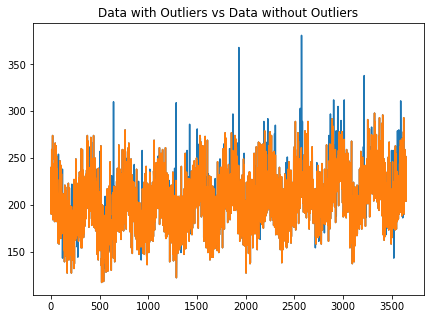

<Figure size 432x288 with 0 Axes>

In [ ]:
# Outlier detection for green curry
outlier_indices = hampel(df_gc.Sales, window_size=5, n=3)
print("Outlier Indices: ", outlier_indices)

# Outlier Imputation with rolling median for green curry
Outlier_imputation_gc = hampel(df_gc.Sales, window_size=5, n=3, imputation=True) # If set to False, then the algorithm will be used for outlier detection. If set to True, then the algorithm will also imput the outliers with the rolling median.

# Plot Original Data vs. Outliers for green curry
df_gc.Sales.plot(figsize=(7,5),title='Data with Outliers vs Data without Outliers')
Outlier_imputation_gc.plot()
plt.figure()
plt.show()

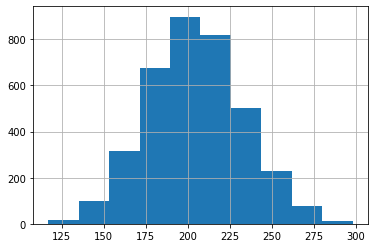

In [ ]:
# Print the new outlier histogram
Outlier_imputation_gc.hist()

##### **Interquartile Range (IQR)**

* https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
> The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles.  It is represented by the formula IQR = Q3 − Q1. 

In [ ]:
# Use formula IQR = Q3-Q1 to calculate IQR Score
Q1 = df_gc.quantile(0.25)
Q3 = df_gc.quantile(0.75)
IQR_df_gc = Q3 - Q1

# Print the IQR Score
print(IQR_df_gc)

Sales    39.0
dtype: float64


In [ ]:
# Use the following formula to remove Outliers
df_gc_output = df_gc[~((df_gc < (Q1 - 1.5 * IQR_df_gc)) |(df_gc > (Q3 + 1.5 * IQR_df_gc))).any(axis=1)]
print(df_gc_output.shape)

(3612, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


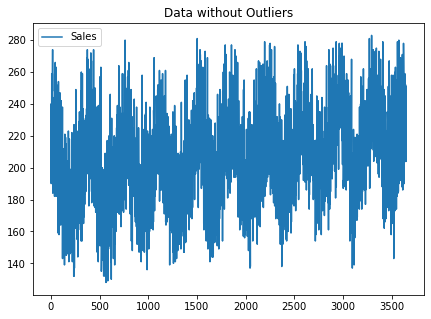

In [ ]:
#Plot the data to find Outliers
df_gc_output.plot(figsize=(7,5),title='Data without Outliers')

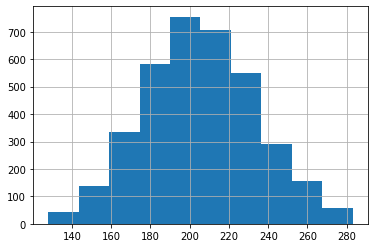

In [ ]:
# Print the new Outlier histogram
df_gc_output.Sales.hist()

##### **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**
* https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce
> 

In [ ]:
# Use function define in reference. A cluster label of -1 is considered as outlier.
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']

In [ ]:
# Start with default eps value of 0.5 and min_samples value of 5
clusters=remove_outliers_DBSCAN((df_gc.Sales),0.5,5)
clusters.value_counts().sort_values(ascending=False)

-1      90
 68     58
 9      58
 19     56
 47     54
        ..
 75      5
 36      5
 127     5
 128     5
 129     5
Name: cluster, Length: 132, dtype: int64

In [ ]:
# Get the indices of the outliers.
df_gc_cluster = pd.DataFrame(clusters)
ind_outlier_gc = df_gc_cluster.index[df_gc_cluster['cluster']==-1]

# Print number of outliers present
print('Number of outliers present:', len(ind_outlier_gc))

Number of outliers present: 90


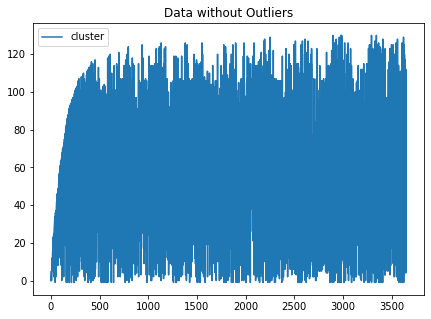

In [ ]:
#Plot the data to find Outliers
df_gc_cluster.plot(figsize=(7,5),title='Data without Outliers')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8999c25a10>]],
      dtype=object)

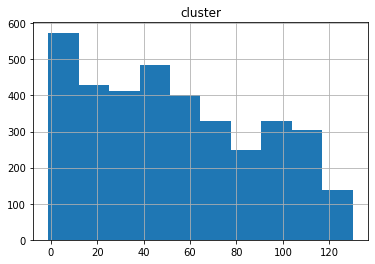

In [ ]:
df_gc_cluster.hist()

#### Vegetable curry

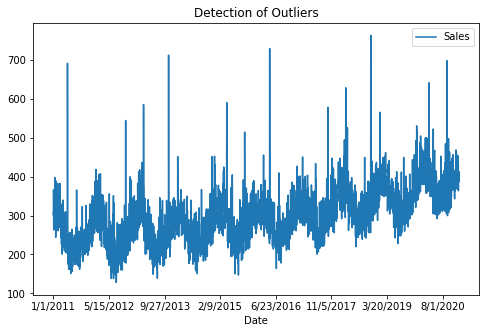

In [ ]:
#Plot the data to find Outliers
df_vc.plot(x='Date',y='Sales',kind='line',figsize=(8,5),title='Detection of Outliers')

##### **Hampel**

* https://medium.com/wwblog/clean-up-your-time-series-data-with-a-hampel-filter-58b0bb3ebb04
* https://pypi.org/project/hampel/

Outlier Indices:  [32, 33, 58, 87, 100, 104, 127, 138, 209, 216, 293, 327, 360, 402, 423, 477, 502, 503, 540, 640, 650, 689, 699, 728, 745, 767, 776, 811, 817, 826, 847, 853, 914, 920, 921, 949, 957, 1004, 1036, 1048, 1099, 1118, 1119, 1125, 1127, 1199, 1202, 1225, 1236, 1311, 1322, 1332, 1344, 1384, 1386, 1391, 1411, 1425, 1449, 1453, 1459, 1473, 1484, 1559, 1575, 1584, 1585, 1598, 1608, 1609, 1610, 1620, 1622, 1626, 1633, 1634, 1654, 1676, 1720, 1811, 1876, 1890, 1905, 1936, 1945, 1950, 1957, 1970, 1973, 1977, 1978, 1987, 2027, 2119, 2145, 2210, 2220, 2260, 2285, 2333, 2358, 2393, 2400, 2409, 2410, 2425, 2436, 2468, 2484, 2507, 2563, 2576, 2577, 2594, 2606, 2629, 2632, 2640, 2644, 2711, 2767, 2772, 2799, 2854, 2866, 2882, 2915, 2922, 2936, 2943, 3020, 3054, 3060, 3078, 3087, 3109, 3111, 3129, 3150, 3158, 3162, 3171, 3229, 3240, 3261, 3267, 3271, 3295, 3302, 3377, 3416, 3471, 3477, 3485, 3486, 3494, 3508, 3515, 3538, 3553, 3561, 3562, 3636]


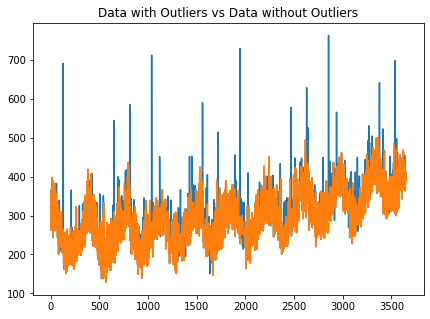

<Figure size 432x288 with 0 Axes>

In [ ]:
# Outlier detection for vegetable curry
outlier_indices = hampel(df_vc.Sales, window_size=5, n=3)
print("Outlier Indices: ", outlier_indices)

# Outlier Imputation with rolling median for vegetable curry
Outlier_imputation_vc = hampel(df_vc.Sales, window_size=5, n=3, imputation=True) # If set to False, then the algorithm will be used for outlier detection. If set to True, then the algorithm will also imput the outliers with the rolling median.

# Plot Original Data vs. Outliers for vegetable curry
df_vc.Sales.plot(figsize=(7,5),title='Data with Outliers vs Data without Outliers')
Outlier_imputation_vc.plot()
plt.figure()
plt.show()

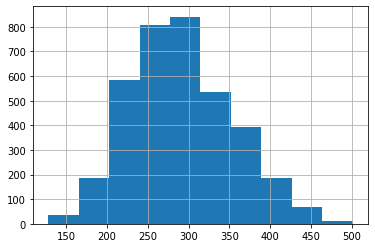

In [ ]:
# Print the new outlier histogram
Outlier_imputation_vc.hist()

##### **Interquartile Range (IQR)**

* https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
> The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles.  It is represented by the formula IQR = Q3 − Q1. 

In [ ]:
# Use formula IQR = Q3-Q1 to calculate IQR Score for vegetable curry
Q1 = df_vc.quantile(0.25)
Q3 = df_vc.quantile(0.75)
IQR_df_vc = Q3 - Q1

# Print the IQR Score
print(IQR_df_vc)

Sales    91.0
dtype: float64


In [ ]:
# Use the following formula to remove Outliers for vegetable curry
df_vc_output = df_vc[~((df_vc < (Q1 - 1.5 * IQR_df_vc)) |(df_vc > (Q3 + 1.5 * IQR_df_vc))).any(axis=1)]
print(df_vc_output.shape)

(3622, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


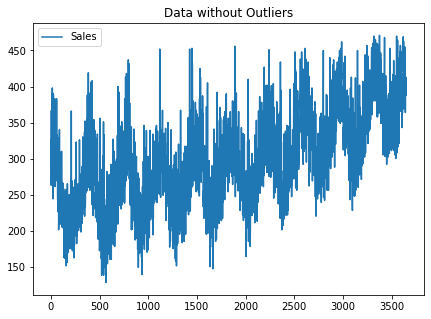

In [ ]:
#Plot the data to find Outliers for vegetable curry
df_vc_output.plot(figsize=(7,5),title='Data without Outliers')

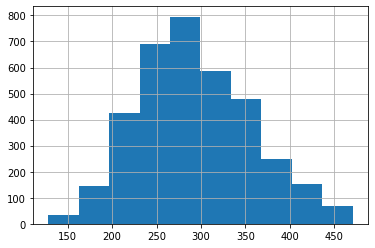

In [ ]:
# Print the new Outlier histogram
df_vc_output.Sales.hist()

##### **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**
* https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce
> 

In [ ]:
# Use function define in reference. A cluster label of -1 is considered as outlier.
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']

In [ ]:
# Start with default eps value of 0.5 and min_samples value of 5
clusters=remove_outliers_DBSCAN((df_vc.Sales),0.5,5)
clusters.value_counts().sort_values(ascending=False)

-1      239
 52      34
 22      34
 137     33
 74      31
       ... 
 94       5
 230      5
 101      5
 191      5
 220      5
Name: cluster, Length: 234, dtype: int64

In [ ]:
# Get the indices of the outliers.
df_vc_cluster = pd.DataFrame(clusters)
ind_outlier_vc = df_vc_cluster.index[df_vc_cluster['cluster']==-1]

# Print number of outliers present
print('Number of outliers present:', len(ind_outlier_vc))

Number of outliers present: 239


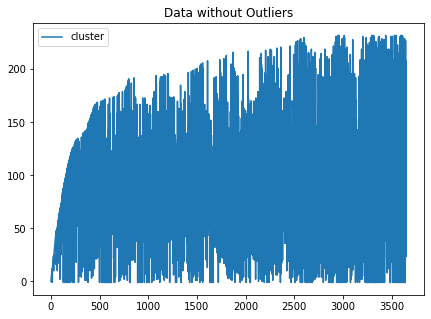

In [ ]:
#Plot the data to find Outliers
df_vc_cluster.plot(figsize=(7,5),title='Data without Outliers')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89998c67d0>]],
      dtype=object)

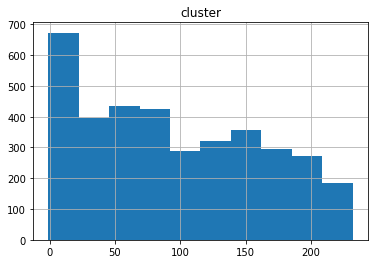

In [ ]:
df_vc_cluster.hist()

## **STEP 1** 

Develop neural network models for forecasting the demand of each individual product, i.e. use DA for
green thai curry and DB for vegetable korma curry. In either case, use 85% of the data for training and the
rest for testing. Use a single hidden layer. Vary the number of neurons in the hidden layer using 3, 5, 7,
and 9 neurons (for each architecture, record the Akaike Information Criteria). Let the predictions of each
model be FA and FB, respectively.

* 1.1 Make a table that shows the Akaike Information Criteria for each number of neurons for product-level model FA.
* 1.2 Report the best number of neurons in the hidden layer of the product-level model FA.
* 1.3 Repeat 1.1 and 1.2 for FB.

### *Lagging, scaling and normalizing data*

#### Green curry

In [ ]:
# Based on out analysis we are to use the information of HampelData
DB_Hampel_gc = Outlier_imputation_gc.copy(deep=True)
DB_Hampel_gc.head()

0    208.0
1    240.0
2    206.0
3    190.0
4    228.0
Name: Sales, dtype: float64

In [ ]:
#Initialize the index at 1
DB_Hampel_gc.index = DB_Hampel_gc.index + 1 

# Lag the DataFrame
data_gc = pd.concat([DB_Hampel_gc.shift(1), DB_Hampel_gc.shift(2), DB_Hampel_gc.shift(3), DB_Hampel_gc], axis=1)
data_gc.columns = ['x1','x2', 'x3', 'y']
data_gc = data_gc.iloc[4:,]
data_gc.head()

,x1,x2,x3,y
5,190.0,206.0,240.0,228.0
6,228.0,190.0,206.0,235.0
7,235.0,228.0,190.0,208.0
8,208.0,235.0,228.0,229.0
9,229.0,208.0,235.0,259.0


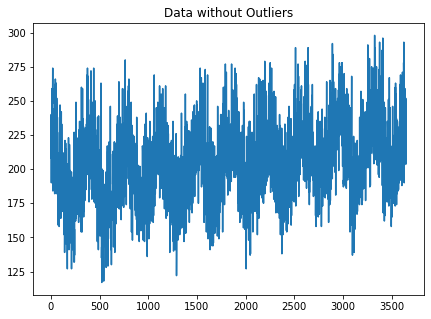

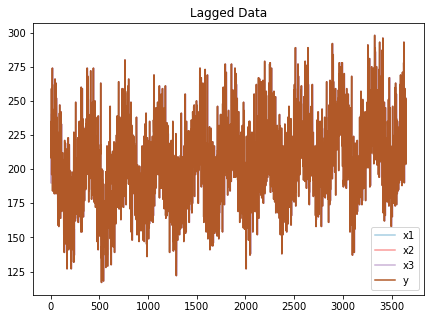

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot data without Outliers and the lagged Data
DB_Hampel_gc.plot(figsize=(7,5),title='Data without Outliers')
data_gc.plot(colormap='Paired',figsize=(7,5),title='Lagged Data')
plt.figure().show()

In [ ]:
# Pick 85% of the data but keeps the original sequence (R)
train_gc = data_gc[:int(data_gc.shape[0]*0.85)]
test_gc = data_gc[int(data_gc.shape[0]*0.85):]

# Clean data in case of missing data
data_gc = data_gc.dropna()
train_gc = train_gc.dropna()
test_gc = test_gc.dropna()

In [ ]:
# Calculate parameter for scaling back the outcome variable, both for the prediction and the actual values
ytrain_min_gc = float(train_gc.min()['y'])
ytrain_max_gc = float(train_gc.max()['y'])
ytrain_range_gc = ytrain_max_gc - ytrain_min_gc

ytest_min_gc = float(test_gc.min()['y'])
ytest_max_gc = float(test_gc.max()['y'])
ytest_range_gc = ytest_max_gc - ytest_min_gc

In [ ]:
# Normalize the data frame
def scale(data):
    scaled_data = data.copy()
    for column in data.columns: 
      scaled_data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    return scaled_data

In [ ]:
# Scale back the data frame
def scale_back(data, data_min, data_range):
    data_ = data.copy()
    data_.head()
    for column in data_.columns: 
        data_[column] = (data_range) * data_[column] + data_min
    return data_

In [ ]:
# Normalize the train data in the range of 0-1
train_ = scale(train_gc)

In [ ]:
# Normalize the test data in the range of 0-1
test_ = scale(test_gc)
test_

,x1,x2,x3,y
3104,0.352201,0.320755,0.440252,0.421384
3105,0.421384,0.352201,0.320755,0.396226
3106,0.396226,0.421384,0.352201,0.119497
3107,0.119497,0.396226,0.421384,0.270440
3108,0.270440,0.119497,0.396226,0.144654
...,...,...,...,...
3646,0.710692,0.484277,0.446541,0.408805
3647,0.408805,0.710692,0.484277,0.704403
3648,0.704403,0.408805,0.710692,0.559748
3649,0.559748,0.704403,0.408805,0.647799


In [ ]:
# Separate the input (x) and output (y)
n_gc = train_.columns                                # Column labels
xtrain_gc = train_.filter(items = ['x1','x2','x3'])  # Input of the training set
ytrain_gc = train_.filter(items = ['y'])             # Output of the training set

xtest_gc = test_.filter(items = ['x1','x2','x3'])    # Input of the test set
ytest_gc = test_.filter(items = ['y'])               # Output of the test set

ytest_gc.head()

,y
3104,0.421384
3105,0.396226
3106,0.119497
3107,0.270440
3108,0.144654


#### Vegetable curry

In [ ]:
# Based on out analysis we are to use the information of HampelData
DB_Hampel_vc = Outlier_imputation_vc.copy(deep=True)
DB_Hampel_vc.head()

0    366.0
1    301.0
2    309.0
3    263.0
4    279.0
Name: Sales, dtype: float64

In [ ]:
#Initialize the index at 1
DB_Hampel_vc.index = DB_Hampel_vc.index + 1 

# Lag the DataFrame
data_vc = pd.concat([DB_Hampel_vc.shift(1), DB_Hampel_vc.shift(2), DB_Hampel_vc.shift(3), DB_Hampel_vc], axis=1)
data_vc.columns = ['x1','x2', 'x3', 'y']
data_vc = data_vc.iloc[4:,]
data_vc.head()

,x1,x2,x3,y
5,263.0,309.0,301.0,279.0
6,279.0,263.0,309.0,326.0
7,326.0,279.0,263.0,291.0
8,291.0,326.0,279.0,315.0
9,315.0,291.0,326.0,342.0


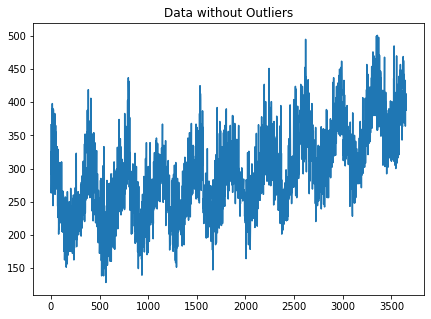

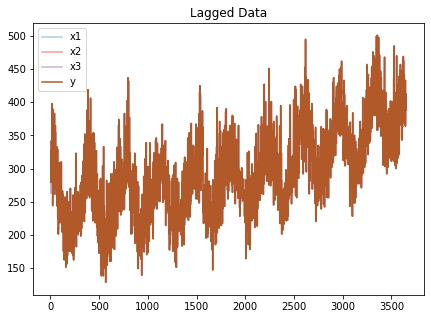

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot data without Outliers and the lagged Data
DB_Hampel_vc.plot(figsize=(7,5),title='Data without Outliers')
data_vc.plot(colormap='Paired',figsize=(7,5),title='Lagged Data')
plt.figure().show()

In [ ]:
# Pick 85% of the data but keeps the original sequence (R)
train_vc = data_vc[:int(data_vc.shape[0]*0.85)]
test_vc = data_vc[int(data_vc.shape[0]*0.85):]

# Clean data in case of missing data
data_vc = data_vc.dropna()
train_vc = train_vc.dropna()
test_vc = test_vc.dropna()

In [ ]:
# Calculate parameter for scaling back the outcome variable, both for the prediction and the actual values
ytrain_min_vc = float(train_vc.min()['y'])
ytrain_max_vc = float(train_vc.max()['y'])
ytrain_range_vc = ytrain_max_vc - ytrain_min_vc

ytest_min_vc = float(test_vc.min()['y'])
ytest_max_vc = float(test_vc.max()['y'])
ytest_range_vc = ytest_max_vc - ytest_min_vc

In [ ]:
# Normalize the data frame
def scale(data):
    scaled_data = data.copy()
    for column in data.columns: 
      scaled_data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    return scaled_data

In [ ]:
# Scale back the data frame
def scale_back(data, data_min, data_range):
    data_ = data.copy()
    data_.head()
    for column in data_.columns: 
        data_[column] = (data_range) * data_[column] + data_min
    return data_

In [ ]:
# Normalize the train data in the range of 0-1
train_ = scale(train_gc)

In [ ]:
# Normalize the test data in the range of 0-1
test_ = scale(test_gc)
test_

,x1,x2,x3,y
3104,0.352201,0.320755,0.440252,0.421384
3105,0.421384,0.352201,0.320755,0.396226
3106,0.396226,0.421384,0.352201,0.119497
3107,0.119497,0.396226,0.421384,0.270440
3108,0.270440,0.119497,0.396226,0.144654
...,...,...,...,...
3646,0.710692,0.484277,0.446541,0.408805
3647,0.408805,0.710692,0.484277,0.704403
3648,0.704403,0.408805,0.710692,0.559748
3649,0.559748,0.704403,0.408805,0.647799


In [ ]:
# Separate the input (x) and output (y)
n_vc = train_.columns                                # Column labels
xtrain_vc = train_.filter(items = ['x1','x2','x3'])  # Input of the training set
ytrain_vc = train_.filter(items = ['y'])             # Output of the training set

xtest_vc = test_.filter(items = ['x1','x2','x3'])    # Input of the test set
ytest_vc = test_.filter(items = ['y'])               # Output of the test set

ytest_vc.head()

,y
3104,0.421384
3105,0.396226
3106,0.119497
3107,0.270440
3108,0.144654


### **3 Neurons** 

#### Green curry - 3 Neurons
R-squared score of the train set for green curry: 0.2488

Root mean squared error of the train set for green curry: 25.5151

Total number of parameters for green curry:  28

Akaike Information Criterion for green curry: 14107.9481

Corrected Akaike Information Criterion for green curry: 14108.7069

In [ ]:
# Train a neural network model - Using 3 Neurons
# https://www.tensorflow.org/api_docs/python/tf/keras/activations
print("Train a neural network model - Using 3 Neurons")
model_3neurons_gc = Sequential()

# First add a layer with 3 neurons for 3 input variables (3 lags) and the RELU activation function
model_3neurons_gc.add(Dense(3, input_dim=3, activation='relu'))

# Then add a hidden layer with n neurons and the sigmoid activation function
model_3neurons_gc.add(Dense(3, activation='sigmoid'))

# Then add the output layer with 1 neuron and a linear activation function
model_3neurons_gc.add(Dense(1))


model_3neurons_gc.summary()
print(model_3neurons_gc.count_params())
opt_3neurons_gc = tf.optimizers.Adam(learning_rate=0.0005)
print("")
print("Generating model ...")

# Fix random seed for reproducibility
seed = 1

Train a neural network model - Using 3 Neurons
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 12        
                                                                 
 dense_10 (Dense)            (None, 3)                 12        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
28

Generating model ...


In [ ]:
xtrain_for_parameter_fitting_3neurons_gc, x_validation_3neurons_gc, ytrain_for_parameter_fitting_3neurons_gc, y_validation_3neurons_gc = train_test_split(xtrain_gc, ytrain_gc, test_size=0.3, random_state=seed)
model_3neurons_gc.compile(loss='mse', optimizer=opt_3neurons_gc, metrics=['mean_squared_error'])
history_3neurons_gc = model_3neurons_gc.fit(x=xtrain_for_parameter_fitting_3neurons_gc,y=ytrain_for_parameter_fitting_3neurons_gc, epochs=200, validation_data=(x_validation_3neurons_gc,y_validation_3neurons_gc), verbose=0)
print("Model generation completed - 3 Neurons")

Model generation completed - 3 Neurons


Final loss value in training set:  0.017230337485671043
Final loss value in validation set:  0.01830846257507801


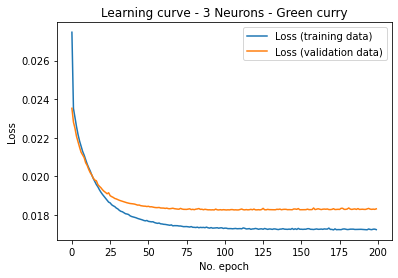

In [ ]:
loss_3neurons_gc = history_3neurons_gc.history['loss']
val_loss_3neurons_gc = history_3neurons_gc.history['val_loss']

print("Final loss value in training set: ", loss_3neurons_gc[-1])
print("Final loss value in validation set: ", val_loss_3neurons_gc[-1])

# Plot learning curve
plt.plot(history_3neurons_gc.history['loss'], label='Loss (training data)')
plt.plot(history_3neurons_gc.history['val_loss'], label='Loss (validation data)')
plt.title('Learning curve - 3 Neurons - Green curry')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Use the model to calculate predictions for the train set
y_pred_3neurons_gc = model_3neurons_gc.predict(xtest_gc)
y_pred_df_3neurons_gc = pd.DataFrame(y_pred_3neurons_gc)
y_pred_df_3neurons_gc.columns =['y'] 

# Scale back the predictions and original values
y_pred_rescaled_3neurons_gc = scale_back(pd.DataFrame(y_pred_3neurons_gc), ytrain_min_gc, ytrain_range_gc)
y_pred_rescaled_3neurons_gc.columns =['y'] 
y_train_rescaled_3neurons_gc = scale_back(pd.DataFrame(ytest_gc), ytrain_min_gc, ytrain_range_gc)
y_train_rescaled_3neurons_gc.head()

,y
3104,190.742138
3105,186.339623
3106,137.911950
3107,164.327044
3108,142.314465


In [ ]:
# r-squared
r2_squared_3neurons_gc = r2_score(y_train_rescaled_3neurons_gc, y_pred_rescaled_3neurons_gc)
print('R-squared score of the train set for green curry:', round(r2_squared_3neurons_gc,4))

# mean squared error
mse_3neurons_gc = mean_squared_error(y_train_rescaled_3neurons_gc, y_pred_rescaled_3neurons_gc)
rmse_3neurons_gc = np.sqrt(mse_3neurons_gc)
print('Root mean squared error of the train set for green curry:', round(rmse_3neurons_gc, 4))

# AIC
# trainable_weights includes neuron weights and biases
param_num_3neurons_gc = model_3neurons_gc.count_params()
print("Total number of parameters for green curry: ", param_num_3neurons_gc)
no_data_points_3neurons_gc = xtrain_for_parameter_fitting_3neurons_gc.shape[0]
aic_3neurons_gc = no_data_points_3neurons_gc * np.log(mse_3neurons_gc) + 2 * param_num_3neurons_gc
print("Akaike Information Criterion for green curry:", round(aic_3neurons_gc, 4))

# Corrected AIC
aic_corrected_3neurons_gc = aic_3neurons_gc + \
                2 * param_num_3neurons_gc*(param_num_3neurons_gc+1)/(no_data_points_3neurons_gc - param_num_3neurons_gc -1)
print("Corrected Akaike Information Criterion for green curry:", round(aic_corrected_3neurons_gc, 4))

R-squared score of the train set for green curry: 0.2442
Root mean squared error of the train set for green curry: 25.594
Total number of parameters for green curry:  28
Akaike Information Criterion for green curry: 14121.3567
Corrected Akaike Information Criterion for green curry: 14122.1156


#### Vegetable curry - 3 Neurons
R-squared score of the train set for vegetable curry: 0.2494

Root mean squared error of the train set for vegetable curry: 53.4887

Total number of parameters for vegetable curry:  28

Akaike Information Criterion for vegetable curry: 17318.946

Corrected Akaike Information Criterion for green curry: 17319.7049

In [ ]:
# Train a neural network model - Using 3 Neurons
# https://www.tensorflow.org/api_docs/python/tf/keras/activations
print("Train a neural network model - Using 3 Neurons")
model_3neurons_vc = Sequential()

# First add a layer with 3 neurons for 3 input variables (3 lags) and the RELU activation function
model_3neurons_vc.add(Dense(3, input_dim=3, activation='relu'))

# Then add a hidden layer with n neurons and the sigmoid activation function
model_3neurons_vc.add(Dense(3, activation='sigmoid'))

# Then add the output layer with 1 neuron and a linear activation function
model_3neurons_vc.add(Dense(1))
model_3neurons_vc.summary()
print(model_3neurons_vc.count_params())
opt_3neurons_vc = tf.optimizers.Adam(learning_rate=0.0005)
print("")
print("Generating model ...")

# Fix random seed for reproducibility
seed = 1

Train a neural network model - Using 3 Neurons
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 12        
                                                                 
 dense_13 (Dense)            (None, 3)                 12        
                                                                 
 dense_14 (Dense)            (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
28

Generating model ...


In [ ]:
xtrain_for_parameter_fitting_3neurons_vc, x_validation_3neurons_vc, ytrain_for_parameter_fitting_3neurons_vc, y_validation_3neurons_vc = train_test_split(xtrain_vc, ytrain_vc, test_size=0.3, random_state=seed)
model_3neurons_vc.compile(loss='mse', optimizer=opt_3neurons_vc, metrics=['mean_squared_error'])
history_3neurons_vc = model_3neurons_vc.fit(x=xtrain_for_parameter_fitting_3neurons_vc,y=ytrain_for_parameter_fitting_3neurons_vc, epochs=200, validation_data=(x_validation_3neurons_vc, y_validation_3neurons_vc), verbose=0)
print("Model generation completed - 3 Neurons for Vegetable curry")

Model generation completed - 3 Neurons for Vegetable curry


Final loss value in training set for Vegetable Curry:  0.017523135989904404
Final loss value in validation set for Vegetable Curry:  0.018271775916218758


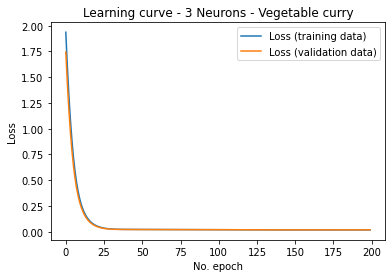

In [ ]:
loss_3neurons_vc = history_3neurons_vc.history['loss']
val_loss_3neurons_vc = history_3neurons_vc.history['val_loss']

print("Final loss value in training set for Vegetable Curry: ", loss_3neurons_vc[-1])
print("Final loss value in validation set for Vegetable Curry: ", val_loss_3neurons_vc[-1])

# Plot learning curve
plt.plot(history_3neurons_vc.history['loss'], label='Loss (training data)')
plt.plot(history_3neurons_vc.history['val_loss'], label='Loss (validation data)')
plt.title('Learning curve - 3 Neurons - Vegetable curry')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Use the model to calculate predictions for the train set
y_pred_3neurons_vc = model_3neurons_vc.predict(xtest_vc)
y_pred_df_3neurons_vc = pd.DataFrame(y_pred_3neurons_vc)
y_pred_df_3neurons_vc.columns =['y'] 

# Scale back the predictions and original values
y_pred_rescaled_3neurons_vc = scale_back(pd.DataFrame(y_pred_3neurons_vc), ytrain_min_vc, ytrain_range_vc)
y_pred_rescaled_3neurons_vc.columns =['y'] 
y_train_rescaled_3neurons_vc = scale_back(pd.DataFrame(ytest_vc), ytrain_min_vc, ytrain_range_vc)
y_train_rescaled_3neurons_vc.head()

,y
3104,282.647799
3105,273.415094
3106,171.855346
3107,227.251572
3108,181.088050


In [ ]:
# r-squared
r2_squared_3neurons_vc = r2_score(y_train_rescaled_3neurons_vc, y_pred_rescaled_3neurons_vc)
print('R-squared score of the train set for vegetable curry:', round(r2_squared_3neurons_vc,4))

# mean squared error
mse_3neurons_vc = mean_squared_error(y_train_rescaled_3neurons_vc, y_pred_rescaled_3neurons_vc)
rmse_3neurons_vc = np.sqrt(mse_3neurons_vc)
print('Root mean squared error of the train set for vegetable curry:', round(rmse_3neurons_vc, 4))

# AIC
# trainable_weights includes neuron weights and biases
param_num_3neurons_vc = model_3neurons_vc.count_params()
print("Total number of parameters for vegetable curry: ", param_num_3neurons_vc)
no_data_points_3neurons_vc = xtrain_for_parameter_fitting_3neurons_vc.shape[0]
aic_3neurons_vc = no_data_points_3neurons_vc * np.log(mse_3neurons_vc) + 2 * param_num_3neurons_vc
print("Akaike Information Criterion for vegetable curry:", round(aic_3neurons_vc, 4))

# Corrected AIC
aic_corrected_3neurons_vc = aic_3neurons_vc + \
                2 * param_num_3neurons_vc*(param_num_3neurons_vc+1)/(no_data_points_3neurons_vc - param_num_3neurons_vc -1)
print("Corrected Akaike Information Criterion for green curry:", round(aic_corrected_3neurons_vc, 4))

R-squared score of the train set for vegetable curry: 0.2439
Root mean squared error of the train set for vegetable curry: 53.6856
Total number of parameters for vegetable curry:  28
Akaike Information Criterion for vegetable curry: 17334.8816
Corrected Akaike Information Criterion for green curry: 17335.6405


### **5 Neurons** 

#### Green curry - 5 Neurons
R-squared score of the train set for green curry: 0.2438

Root mean squared error of the train set for green curry: 25.5995

Total number of parameters for green curry:  38

Akaike Information Criterion for green curry: 14142.289

Corrected Akaike Information Criterion for green curry: 14143.6806

In [ ]:
# Train a neural network model - Using 3 Neurons
# https://www.tensorflow.org/api_docs/python/tf/keras/activations
print("Train a neural network model - Using 5 Neurons")
model_5neurons_gc = Sequential()

# First add a layer with 3 neurons for 3 input variables (3 lags) and the RELU activation function
model_5neurons_gc.add(Dense(3, input_dim=3, activation='relu'))

# Then add a hidden layer with n neurons and the sigmoid activation function
model_5neurons_gc.add(Dense(5, activation='sigmoid'))

# Then add the output layer with 1 neuron and a linear activation function
model_5neurons_gc.add(Dense(1))
model_5neurons_gc.summary()
print(model_5neurons_gc.count_params())
opt_5neurons_gc = tf.optimizers.Adam(learning_rate=0.0005)
print("")
print("Generating model ...")

# Fix random seed for reproducibility
seed = 1

Train a neural network model - Using 5 Neurons
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 3)                 12        
                                                                 
 dense_16 (Dense)            (None, 5)                 20        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________
38

Generating model ...


In [ ]:
xtrain_for_parameter_fitting_5neurons_gc, x_validation_5neurons_gc, ytrain_for_parameter_fitting_5neurons_gc, y_validation_5neurons_gc = train_test_split(xtrain_gc, ytrain_gc, test_size=0.3, random_state=seed)
model_5neurons_gc.compile(loss='mse', optimizer=opt_5neurons_gc, metrics=['mean_squared_error'])
history_5neurons_gc = model_5neurons_gc.fit(x=xtrain_for_parameter_fitting_5neurons_gc,y=ytrain_for_parameter_fitting_5neurons_gc, epochs=200, validation_data=(x_validation_5neurons_gc,y_validation_5neurons_gc), verbose=0)
print("Model generation completed - 5 Neurons")

Model generation completed - 5 Neurons


Final loss value in training set:  0.025800446048378944
Final loss value in validation set:  0.024979164823889732


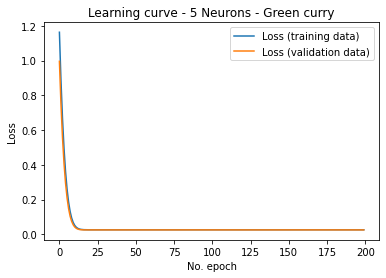

In [ ]:
loss_5neurons_gc = history_5neurons_gc.history['loss']
val_loss_5neurons_gc = history_5neurons_gc.history['val_loss']

print("Final loss value in training set: ", loss_5neurons_gc[-1])
print("Final loss value in validation set: ", val_loss_5neurons_gc[-1])

# Plot learning curve
plt.plot(history_5neurons_gc.history['loss'], label='Loss (training data)')
plt.plot(history_5neurons_gc.history['val_loss'], label='Loss (validation data)')
plt.title('Learning curve - 5 Neurons - Green curry')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Use the model to calculate predictions for the train set
y_pred_5neurons_gc = model_5neurons_gc.predict(xtest_gc)
y_pred_df_5neurons_gc = pd.DataFrame(y_pred_5neurons_gc)
y_pred_df_5neurons_gc.columns =['y'] 

# Scale back the predictions and original values
y_pred_rescaled_5neurons_gc = scale_back(pd.DataFrame(y_pred_5neurons_gc), ytrain_min_gc, ytrain_range_gc)
y_pred_rescaled_5neurons_gc.columns =['y'] 
y_train_rescaled_5neurons_gc = scale_back(pd.DataFrame(ytest_gc), ytrain_min_gc, ytrain_range_gc)
y_train_rescaled_5neurons_gc.head()

,y
3104,190.742138
3105,186.339623
3106,137.911950
3107,164.327044
3108,142.314465


In [ ]:
# r-squared
r2_squared_5neurons_gc = r2_score(y_train_rescaled_5neurons_gc, y_pred_rescaled_5neurons_gc)
print('R-squared score of the train set for green curry:', round(r2_squared_5neurons_gc,4))

# mean squared error
mse_5neurons_gc = mean_squared_error(y_train_rescaled_5neurons_gc, y_pred_rescaled_5neurons_gc)
rmse_5neurons_gc = np.sqrt(mse_5neurons_gc)
print('Root mean squared error of the train set for green curry:', round(rmse_5neurons_gc, 4))

# AIC
# trainable_weights includes neuron weights and biases
param_num_5neurons_gc = model_5neurons_gc.count_params()
print("Total number of parameters for green curry: ", param_num_5neurons_gc)
no_data_points_5neurons_gc = xtrain_for_parameter_fitting_5neurons_gc.shape[0]
aic_5neurons_gc = no_data_points_5neurons_gc * np.log(mse_5neurons_gc) + 2 * param_num_5neurons_gc
print("Akaike Information Criterion for green curry:", round(aic_5neurons_gc, 4))

# Corrected AIC
aic_corrected_5neurons_gc = aic_5neurons_gc + \
                2 * param_num_5neurons_gc*(param_num_5neurons_gc+1)/(no_data_points_5neurons_gc - param_num_5neurons_gc -1)
print("Corrected Akaike Information Criterion for green curry:", round(aic_corrected_5neurons_gc, 4))

R-squared score of the train set for green curry: -0.0012
Root mean squared error of the train set for green curry: 29.4566
Total number of parameters for green curry:  38
Akaike Information Criterion for green curry: 14751.0938
Corrected Akaike Information Criterion for green curry: 14752.4853


#### Vegetable curry - 5 Neurons
R-squared score of the train set for vegetable curry: 0.2409

Root mean squared error of the train set for vegetable curry: 53.7887

Total number of parameters for vegetable curry:  38

Akaike Information Criterion for vegetable curry: 17363.2075

Corrected Akaike Information Criterion for green curry: 17364.5991

In [ ]:
# Train a neural network model - Using 3 Neurons
# https://www.tensorflow.org/api_docs/python/tf/keras/activations
print("Train a neural network model - Using 3 Neurons")
model_5neurons_vc = Sequential()

# First add a layer with 3 neurons for 3 input variables (3 lags) and the RELU activation function
model_5neurons_vc.add(Dense(3, input_dim=3, activation='relu'))

# Then add a hidden layer with n neurons and the sigmoid activation function
model_5neurons_vc.add(Dense(5, activation='sigmoid'))

# Then add the output layer with 1 neuron and a linear activation function
model_5neurons_vc.add(Dense(1))
model_5neurons_vc.summary()
print(model_5neurons_vc.count_params())
opt_5neurons_vc = tf.optimizers.Adam(learning_rate=0.0005)
print("")
print("Generating model ...")

# Fix random seed for reproducibility
seed = 1

Train a neural network model - Using 3 Neurons
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 3)                 12        
                                                                 
 dense_19 (Dense)            (None, 5)                 20        
                                                                 
 dense_20 (Dense)            (None, 1)                 6         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________
38

Generating model ...


In [ ]:
xtrain_for_parameter_fitting_5neurons_vc, x_validation_5neurons_vc, ytrain_for_parameter_fitting_5neurons_vc, y_validation_5neurons_vc = train_test_split(xtrain_vc, ytrain_vc, test_size=0.3, random_state=seed)
model_5neurons_vc.compile(loss='mse', optimizer=opt_5neurons_vc, metrics=['mean_squared_error'])
history_5neurons_vc = model_5neurons_vc.fit(x=xtrain_for_parameter_fitting_5neurons_vc,y=ytrain_for_parameter_fitting_5neurons_vc, epochs=200, validation_data=(x_validation_5neurons_vc, y_validation_5neurons_vc), verbose=0)
print("Model generation completed - 5 Neurons for Vegetable curry")

Model generation completed - 5 Neurons for Vegetable curry


Final loss value in training set for Vegetable Curry:  0.017357410863041878
Final loss value in validation set for Vegetable Curry:  0.018329206854104996


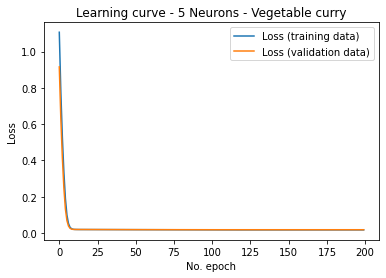

In [ ]:
loss_5neurons_vc = history_5neurons_vc.history['loss']
val_loss_5neurons_vc = history_5neurons_vc.history['val_loss']

print("Final loss value in training set for Vegetable Curry: ", loss_5neurons_vc[-1])
print("Final loss value in validation set for Vegetable Curry: ", val_loss_5neurons_vc[-1])

# Plot learning curve
plt.plot(history_5neurons_vc.history['loss'], label='Loss (training data)')
plt.plot(history_5neurons_vc.history['val_loss'], label='Loss (validation data)')
plt.title('Learning curve - 5 Neurons - Vegetable curry')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Use the model to calculate predictions for the train set
y_pred_5neurons_vc = model_5neurons_vc.predict(xtest_vc)
y_pred_df_5neurons_vc = pd.DataFrame(y_pred_5neurons_vc)
y_pred_df_5neurons_vc.columns =['y'] 

# Scale back the predictions and original values
y_pred_rescaled_5neurons_vc = scale_back(pd.DataFrame(y_pred_5neurons_vc), ytrain_min_vc, ytrain_range_vc)
y_pred_rescaled_5neurons_vc.columns =['y'] 
y_train_rescaled_5neurons_vc = scale_back(pd.DataFrame(ytest_vc), ytrain_min_vc, ytrain_range_vc)
y_train_rescaled_5neurons_vc.head()

,y
3104,282.647799
3105,273.415094
3106,171.855346
3107,227.251572
3108,181.088050


In [ ]:
# r-squared
r2_squared_5neurons_vc = r2_score(y_train_rescaled_5neurons_vc, y_pred_rescaled_5neurons_vc)
print('R-squared score of the train set for vegetable curry:', round(r2_squared_5neurons_vc,4))

# mean squared error
mse_5neurons_vc = mean_squared_error(y_train_rescaled_5neurons_vc, y_pred_rescaled_5neurons_vc)
rmse_5neurons_vc = np.sqrt(mse_5neurons_vc)
print('Root mean squared error of the train set for vegetable curry:', round(rmse_5neurons_vc, 4))

# AIC
# trainable_weights includes neuron weights and biases
param_num_5neurons_vc = model_5neurons_vc.count_params()
print("Total number of parameters for vegetable curry: ", param_num_5neurons_vc)
no_data_points_5neurons_vc = xtrain_for_parameter_fitting_5neurons_vc.shape[0]
aic_5neurons_vc = no_data_points_3neurons_vc * np.log(mse_5neurons_vc) + 2 * param_num_5neurons_vc
print("Akaike Information Criterion for vegetable curry:", round(aic_5neurons_vc, 4))

# Corrected AIC
aic_corrected_5neurons_vc = aic_5neurons_vc + \
                2 * param_num_5neurons_vc*(param_num_5neurons_vc+1)/(no_data_points_5neurons_vc - param_num_5neurons_vc -1)
print("Corrected Akaike Information Criterion for green curry:", round(aic_corrected_5neurons_vc, 4))

R-squared score of the train set for vegetable curry: 0.2433
Root mean squared error of the train set for vegetable curry: 53.7055
Total number of parameters for vegetable curry:  38
Akaike Information Criterion for vegetable curry: 17356.489
Corrected Akaike Information Criterion for green curry: 17357.8805


### **7 Neurons** 

#### Green curry - 5 Neurons
R-squared score of the train set for green curry: 0.2471

Root mean squared error of the train set for green curry: 25.544

Total number of parameters for green curry:  38

Akaike Information Criterion for green curry: 14152.8695

Corrected Akaike Information Criterion for green curry: 14155.0884

In [ ]:
# Train a neural network model - Using 3 Neurons
# https://www.tensorflow.org/api_docs/python/tf/keras/activations
print("Train a neural network model - Using 5 Neurons")
model_7neurons_gc = Sequential()

# First add a layer with 3 neurons for 3 input variables (3 lags) and the RELU activation function
model_7neurons_gc.add(Dense(3, input_dim=3, activation='relu'))

# Then add a hidden layer with n neurons and the sigmoid activation function
model_7neurons_gc.add(Dense(7, activation='sigmoid'))

# Then add the output layer with 1 neuron and a linear activation function
model_7neurons_gc.add(Dense(1))
model_7neurons_gc.summary()
print(model_7neurons_gc.count_params())
opt_7neurons_gc = tf.optimizers.Adam(learning_rate=0.0005)
print("")
print("Generating model ...")

# Fix random seed for reproducibility
seed = 1

Train a neural network model - Using 5 Neurons
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 3)                 12        
                                                                 
 dense_22 (Dense)            (None, 7)                 28        
                                                                 
 dense_23 (Dense)            (None, 1)                 8         
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________
48

Generating model ...


In [ ]:
xtrain_for_parameter_fitting_7neurons_gc, x_validation_7neurons_gc, ytrain_for_parameter_fitting_7neurons_gc, y_validation_7neurons_gc = train_test_split(xtrain_gc, ytrain_gc, test_size=0.3, random_state=seed)
model_7neurons_gc.compile(loss='mse', optimizer=opt_7neurons_gc, metrics=['mean_squared_error'])
history_7neurons_gc = model_7neurons_gc.fit(x=xtrain_for_parameter_fitting_7neurons_gc,y=ytrain_for_parameter_fitting_7neurons_gc, epochs=200, validation_data=(x_validation_7neurons_gc,y_validation_7neurons_gc), verbose=0)
print("Model generation completed - 7 Neurons")

Model generation completed - 7 Neurons


Final loss value in training set:  0.017349811270833015
Final loss value in validation set:  0.0183392520993948


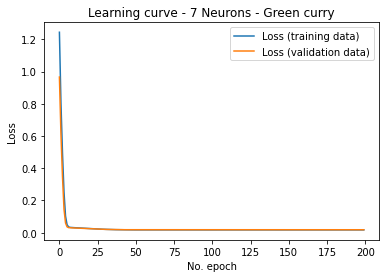

In [ ]:
loss_7neurons_gc = history_7neurons_gc.history['loss']
val_loss_7neurons_gc = history_7neurons_gc.history['val_loss']

print("Final loss value in training set: ", loss_7neurons_gc[-1])
print("Final loss value in validation set: ", val_loss_7neurons_gc[-1])

# Plot learning curve
plt.plot(history_7neurons_gc.history['loss'], label='Loss (training data)')
plt.plot(history_7neurons_gc.history['val_loss'], label='Loss (validation data)')
plt.title('Learning curve - 7 Neurons - Green curry')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Use the model to calculate predictions for the train set
y_pred_7neurons_gc = model_7neurons_gc.predict(xtest_gc)
y_pred_df_7neurons_gc = pd.DataFrame(y_pred_7neurons_gc)
y_pred_df_7neurons_gc.columns =['y'] 

# Scale back the predictions and original values
y_pred_rescaled_7neurons_gc = scale_back(pd.DataFrame(y_pred_7neurons_gc), ytrain_min_gc, ytrain_range_gc)
y_pred_rescaled_7neurons_gc.columns =['y'] 
y_train_rescaled_7neurons_gc = scale_back(pd.DataFrame(ytest_gc), ytrain_min_gc, ytrain_range_gc)
y_train_rescaled_7neurons_gc.head()

,y
3104,190.742138
3105,186.339623
3106,137.911950
3107,164.327044
3108,142.314465


In [ ]:
# r-squared
r2_squared_7neurons_gc = r2_score(y_train_rescaled_7neurons_gc, y_pred_rescaled_7neurons_gc)
print('R-squared score of the train set for green curry:', round(r2_squared_7neurons_gc,4))

# mean squared error
mse_7neurons_gc = mean_squared_error(y_train_rescaled_7neurons_gc, y_pred_rescaled_7neurons_gc)
rmse_7neurons_gc = np.sqrt(mse_7neurons_gc)
print('Root mean squared error of the train set for green curry:', round(rmse_7neurons_gc, 4))

# AIC
# trainable_weights includes neuron weights and biases
param_num_7neurons_gc = model_7neurons_gc.count_params()
print("Total number of parameters for green curry: ", param_num_5neurons_gc)
no_data_points_7neurons_gc = xtrain_for_parameter_fitting_7neurons_gc.shape[0]
aic_7neurons_gc = no_data_points_7neurons_gc * np.log(mse_7neurons_gc) + 2 * param_num_7neurons_gc
print("Akaike Information Criterion for green curry:", round(aic_7neurons_gc, 4))

# Corrected AIC
aic_corrected_7neurons_gc = aic_7neurons_gc + \
                2 * param_num_7neurons_gc*(param_num_7neurons_gc+1)/(no_data_points_7neurons_gc - param_num_7neurons_gc -1)
print("Corrected Akaike Information Criterion for green curry:", round(aic_corrected_7neurons_gc, 4))

R-squared score of the train set for green curry: 0.2405
Root mean squared error of the train set for green curry: 25.6554
Total number of parameters for green curry:  38
Akaike Information Criterion for green curry: 14171.7505
Corrected Akaike Information Criterion for green curry: 14173.9694


#### Vegetable curry - 5 Neurons
R-squared score of the train set for vegetable curry: 0.2476

Root mean squared error of the train set for vegetable curry: 53.5542

Total number of parameters for vegetable curry:  38

Akaike Information Criterion for vegetable curry: 17344.2494

Corrected Akaike Information Criterion for green curry: 17345.6409

In [ ]:
# Train a neural network model - Using 3 Neurons
# https://www.tensorflow.org/api_docs/python/tf/keras/activations
print("Train a neural network model - Using 3 Neurons")
model_7neurons_vc = Sequential()

# First add a layer with 3 neurons for 3 input variables (3 lags) and the RELU activation function
model_7neurons_vc.add(Dense(3, input_dim=3, activation='relu'))

# Then add a hidden layer with n neurons and the sigmoid activation function
model_7neurons_vc.add(Dense(5, activation='sigmoid'))

# Then add the output layer with 1 neuron and a linear activation function
model_7neurons_vc.add(Dense(1))
model_7neurons_vc.summary()
print(model_7neurons_vc.count_params())
opt_7neurons_vc = tf.optimizers.Adam(learning_rate=0.0005)
print("")
print("Generating model ...")

# Fix random seed for reproducibility
seed = 1

Train a neural network model - Using 3 Neurons
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 3)                 12        
                                                                 
 dense_25 (Dense)            (None, 5)                 20        
                                                                 
 dense_26 (Dense)            (None, 1)                 6         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________
38

Generating model ...


In [ ]:
xtrain_for_parameter_fitting_7neurons_vc, x_validation_7neurons_vc, ytrain_for_parameter_fitting_7neurons_vc, y_validation_7neurons_vc = train_test_split(xtrain_vc, ytrain_vc, test_size=0.3, random_state=seed)
model_7neurons_vc.compile(loss='mse', optimizer=opt_7neurons_vc, metrics=['mean_squared_error'])
history_7neurons_vc = model_7neurons_vc.fit(x=xtrain_for_parameter_fitting_7neurons_vc,y=ytrain_for_parameter_fitting_7neurons_vc, epochs=200, validation_data=(x_validation_7neurons_vc, y_validation_7neurons_vc), verbose=0)
print("Model generation completed - 7 Neurons for Vegetable curry")

Model generation completed - 7 Neurons for Vegetable curry


Final loss value in training set for Vegetable Curry:  0.01720510795712471
Final loss value in validation set for Vegetable Curry:  0.018533609807491302


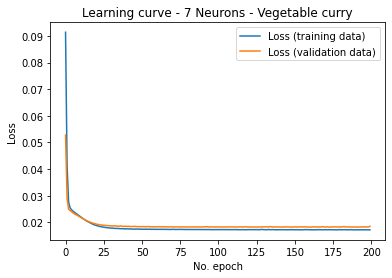

In [ ]:
loss_7neurons_vc = history_7neurons_vc.history['loss']
val_loss_7neurons_vc = history_7neurons_vc.history['val_loss']

print("Final loss value in training set for Vegetable Curry: ", loss_7neurons_vc[-1])
print("Final loss value in validation set for Vegetable Curry: ", val_loss_7neurons_vc[-1])

# Plot learning curve
plt.plot(history_7neurons_vc.history['loss'], label='Loss (training data)')
plt.plot(history_7neurons_vc.history['val_loss'], label='Loss (validation data)')
plt.title('Learning curve - 7 Neurons - Vegetable curry')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Use the model to calculate predictions for the train set
y_pred_7neurons_vc = model_7neurons_vc.predict(xtest_vc)
y_pred_df_7neurons_vc = pd.DataFrame(y_pred_7neurons_vc)
y_pred_df_7neurons_vc.columns =['y'] 

# Scale back the predictions and original values
y_pred_rescaled_7neurons_vc = scale_back(pd.DataFrame(y_pred_7neurons_vc), ytrain_min_vc, ytrain_range_vc)
y_pred_rescaled_7neurons_vc.columns =['y'] 
y_train_rescaled_7neurons_vc = scale_back(pd.DataFrame(ytest_vc), ytrain_min_vc, ytrain_range_vc)
y_train_rescaled_7neurons_vc.head()

,y
3104,282.647799
3105,273.415094
3106,171.855346
3107,227.251572
3108,181.088050


In [ ]:
# r-squared
r2_squared_7neurons_vc = r2_score(y_train_rescaled_7neurons_vc, y_pred_rescaled_7neurons_vc)
print('R-squared score of the train set for vegetable curry:', round(r2_squared_7neurons_vc,4))

# mean squared error
mse_7neurons_vc = mean_squared_error(y_train_rescaled_7neurons_vc, y_pred_rescaled_7neurons_vc)
rmse_7neurons_vc = np.sqrt(mse_7neurons_vc)
print('Root mean squared error of the train set for vegetable curry:', round(rmse_7neurons_vc, 4))

# AIC
# trainable_weights includes neuron weights and biases
param_num_7neurons_vc = model_7neurons_vc.count_params()
print("Total number of parameters for vegetable curry: ", param_num_7neurons_vc)
no_data_points_7neurons_vc = xtrain_for_parameter_fitting_7neurons_vc.shape[0]
aic_7neurons_vc = no_data_points_7neurons_vc * np.log(mse_7neurons_vc) + 2 * param_num_7neurons_vc
print("Akaike Information Criterion for vegetable curry:", round(aic_7neurons_vc, 4))

# Corrected AIC
aic_corrected_7neurons_vc = aic_7neurons_vc + \
                2 * param_num_7neurons_vc*(param_num_5neurons_vc+1)/(no_data_points_7neurons_vc - param_num_7neurons_vc -1)
print("Corrected Akaike Information Criterion for green curry:", round(aic_corrected_7neurons_vc, 4))

R-squared score of the train set for vegetable curry: 0.2441
Root mean squared error of the train set for vegetable curry: 53.6775
Total number of parameters for vegetable curry:  38
Akaike Information Criterion for vegetable curry: 17354.2248
Corrected Akaike Information Criterion for green curry: 17355.6163


### **9 Neurons** 

#### Green curry
R-squared score of the train set for green curry: 0.2445

Root mean squared error of the train set for green curry: 25.5884

Total number of parameters for green curry:  38

Akaike Information Criterion for green curry: 14180.4029

Corrected Akaike Information Criterion for green curry: 14183.6465

In [ ]:
# Train a neural network model - Using 3 Neurons
# https://www.tensorflow.org/api_docs/python/tf/keras/activations
print("Train a neural network model - Using 5 Neurons")
model_9neurons_gc = Sequential()

# First add a layer with 3 neurons for 3 input variables (3 lags) and the RELU activation function
model_9neurons_gc.add(Dense(3, input_dim=3, activation='relu'))

# Then add a hidden layer with n neurons and the sigmoid activation function
model_9neurons_gc.add(Dense(9, activation='sigmoid'))

# Then add the output layer with 1 neuron and a linear activation function
model_9neurons_gc.add(Dense(1))
model_9neurons_gc.summary()
print(model_9neurons_gc.count_params())
opt_9neurons_gc = tf.optimizers.Adam(learning_rate=0.0005)
print("")
print("Generating model ...")

# Fix random seed for reproducibility
seed = 1

Train a neural network model - Using 5 Neurons
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 3)                 12        
                                                                 
 dense_28 (Dense)            (None, 9)                 36        
                                                                 
 dense_29 (Dense)            (None, 1)                 10        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________
58

Generating model ...


In [ ]:
xtrain_for_parameter_fitting_9neurons_gc, x_validation_9neurons_gc, ytrain_for_parameter_fitting_9neurons_gc, y_validation_9neurons_gc = train_test_split(xtrain_gc, ytrain_gc, test_size=0.3, random_state=seed)
model_9neurons_gc.compile(loss='mse', optimizer=opt_9neurons_gc, metrics=['mean_squared_error'])
history_9neurons_gc = model_9neurons_gc.fit(x=xtrain_for_parameter_fitting_9neurons_gc,y=ytrain_for_parameter_fitting_9neurons_gc, epochs=200, validation_data=(x_validation_9neurons_gc,y_validation_9neurons_gc), verbose=0)
print("Model generation completed - 9 Neurons")

Model generation completed - 9 Neurons


Final loss value in training set:  0.017362158745527267
Final loss value in validation set:  0.0183594711124897


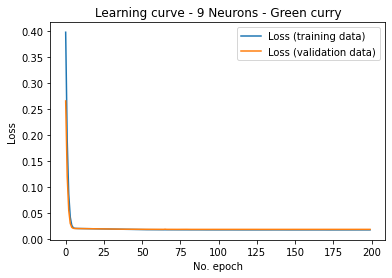

In [ ]:
loss_9neurons_gc = history_9neurons_gc.history['loss']
val_loss_9neurons_gc = history_9neurons_gc.history['val_loss']

print("Final loss value in training set: ", loss_9neurons_gc[-1])
print("Final loss value in validation set: ", val_loss_9neurons_gc[-1])

# Plot learning curve
plt.plot(history_9neurons_gc.history['loss'], label='Loss (training data)')
plt.plot(history_9neurons_gc.history['val_loss'], label='Loss (validation data)')
plt.title('Learning curve - 9 Neurons - Green curry')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Use the model to calculate predictions for the train set
y_pred_9neurons_gc = model_9neurons_gc.predict(xtest_gc)
y_pred_df_9neurons_gc = pd.DataFrame(y_pred_9neurons_gc)
y_pred_df_9neurons_gc.columns =['y'] 

# Scale back the predictions and original values
y_pred_rescaled_9neurons_gc = scale_back(pd.DataFrame(y_pred_9neurons_gc), ytrain_min_gc, ytrain_range_gc)
y_pred_rescaled_9neurons_gc.columns =['y'] 
y_train_rescaled_9neurons_gc = scale_back(pd.DataFrame(ytest_gc), ytrain_min_gc, ytrain_range_gc)
y_train_rescaled_9neurons_gc.head()

,y
3104,190.742138
3105,186.339623
3106,137.911950
3107,164.327044
3108,142.314465


In [ ]:
# r-squared
r2_squared_9neurons_gc = r2_score(y_train_rescaled_9neurons_gc, y_pred_rescaled_9neurons_gc)
print('R-squared score of the train set for green curry:', round(r2_squared_9neurons_gc,4))

# mean squared error
mse_9neurons_gc = mean_squared_error(y_train_rescaled_9neurons_gc, y_pred_rescaled_9neurons_gc)
rmse_9neurons_gc = np.sqrt(mse_9neurons_gc)
print('Root mean squared error of the train set for green curry:', round(rmse_9neurons_gc, 4))

# AIC
# trainable_weights includes neuron weights and biases
param_num_9neurons_gc = model_9neurons_gc.count_params()
print("Total number of parameters for green curry: ", param_num_5neurons_gc)
no_data_points_9neurons_gc = xtrain_for_parameter_fitting_9neurons_gc.shape[0]
aic_9neurons_gc = no_data_points_9neurons_gc * np.log(mse_9neurons_gc) + 2 * param_num_9neurons_gc
print("Akaike Information Criterion for green curry:", round(aic_9neurons_gc, 4))

# Corrected AIC
aic_corrected_9neurons_gc = aic_9neurons_gc + \
                2 * param_num_9neurons_gc*(param_num_9neurons_gc+1)/(no_data_points_9neurons_gc - param_num_9neurons_gc -1)
print("Corrected Akaike Information Criterion for green curry:", round(aic_corrected_9neurons_gc, 4))

R-squared score of the train set for green curry: 0.2433
Root mean squared error of the train set for green curry: 25.6094
Total number of parameters for green curry:  38
Akaike Information Criterion for green curry: 14183.9593
Corrected Akaike Information Criterion for green curry: 14187.2029


#### Vegetable curry

R-squared score of the train set for vegetable curry: 0.2424

Root mean squared error of the train set for vegetable curry: 53.736

Total number of parameters for vegetable curry:  58

Akaike Information Criterion for vegetable curry: 17398.9551

Corrected Akaike Information Criterion for green curry: 17402.1987

In [ ]:
# Train a neural network model - Using 3 Neurons
# https://www.tensorflow.org/api_docs/python/tf/keras/activations
print("Train a neural network model - Using 3 Neurons")
model_9neurons_vc = Sequential()

# First add a layer with 3 neurons for 3 input variables (3 lags) and the RELU activation function
model_9neurons_vc.add(Dense(3, input_dim=3, activation='relu'))

# Then add a hidden layer with n neurons and the sigmoid activation function
model_9neurons_vc.add(Dense(9, activation='sigmoid'))

# Then add the output layer with 1 neuron and a linear activation function
model_9neurons_vc.add(Dense(1))
model_9neurons_vc.summary()
print(model_9neurons_vc.count_params())
opt_9neurons_vc = tf.optimizers.Adam(learning_rate=0.0005)
print("")
print("Generating model ...")

# Fix random seed for reproducibility
seed = 1

Train a neural network model - Using 3 Neurons
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 3)                 12        
                                                                 
 dense_31 (Dense)            (None, 9)                 36        
                                                                 
 dense_32 (Dense)            (None, 1)                 10        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________
58

Generating model ...


In [ ]:
xtrain_for_parameter_fitting_9neurons_vc, x_validation_9neurons_vc, ytrain_for_parameter_fitting_9neurons_vc, y_validation_9neurons_vc = train_test_split(xtrain_vc, ytrain_vc, test_size=0.3, random_state=seed)
model_9neurons_vc.compile(loss='mse', optimizer=opt_9neurons_vc, metrics=['mean_squared_error'])
history_9neurons_vc = model_9neurons_vc.fit(x=xtrain_for_parameter_fitting_9neurons_vc,y=ytrain_for_parameter_fitting_9neurons_vc, epochs=200, validation_data=(x_validation_9neurons_vc, y_validation_9neurons_vc), verbose=0)
print("Model generation completed - 9 Neurons for Vegetable curry")

Model generation completed - 9 Neurons for Vegetable curry


Final loss value in training set for Vegetable Curry:  0.017212046310305595
Final loss value in validation set for Vegetable Curry:  0.018361281603574753


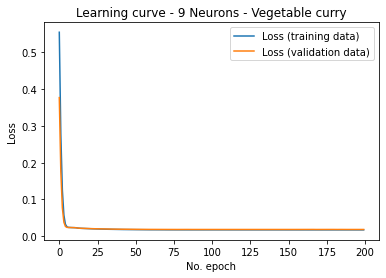

In [ ]:
loss_9neurons_vc = history_9neurons_vc.history['loss']
val_loss_9neurons_vc = history_9neurons_vc.history['val_loss']

print("Final loss value in training set for Vegetable Curry: ", loss_9neurons_vc[-1])
print("Final loss value in validation set for Vegetable Curry: ", val_loss_9neurons_vc[-1])

# Plot learning curve
plt.plot(history_9neurons_vc.history['loss'], label='Loss (training data)')
plt.plot(history_9neurons_vc.history['val_loss'], label='Loss (validation data)')
plt.title('Learning curve - 9 Neurons - Vegetable curry')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Use the model to calculate predictions for the train set
y_pred_9neurons_vc = model_9neurons_vc.predict(xtest_vc)
y_pred_df_9neurons_vc = pd.DataFrame(y_pred_9neurons_vc)
y_pred_df_9neurons_vc.columns =['y'] 

# Scale back the predictions and original values
y_pred_rescaled_9neurons_vc = scale_back(pd.DataFrame(y_pred_9neurons_vc), ytrain_min_vc, ytrain_range_vc)
y_pred_rescaled_9neurons_vc.columns =['y'] 
y_train_rescaled_9neurons_vc = scale_back(pd.DataFrame(ytest_vc), ytrain_min_vc, ytrain_range_vc)
y_train_rescaled_9neurons_vc.head()

,y
3104,282.647799
3105,273.415094
3106,171.855346
3107,227.251572
3108,181.088050


In [ ]:
# r-squared
r2_squared_9neurons_vc = r2_score(y_train_rescaled_9neurons_vc, y_pred_rescaled_9neurons_vc)
print('R-squared score of the train set for vegetable curry:', round(r2_squared_9neurons_vc,4))

# mean squared error
mse_9neurons_vc = mean_squared_error(y_train_rescaled_9neurons_vc, y_pred_rescaled_9neurons_vc)
rmse_9neurons_vc = np.sqrt(mse_9neurons_vc)
print('Root mean squared error of the train set for vegetable curry:', round(rmse_9neurons_vc, 4))

# AIC
# trainable_weights includes neuron weights and biases
param_num_9neurons_vc = model_9neurons_vc.count_params()
print("Total number of parameters for vegetable curry: ", param_num_9neurons_vc)
no_data_points_9neurons_vc = xtrain_for_parameter_fitting_9neurons_vc.shape[0]
aic_9neurons_vc = no_data_points_9neurons_vc * np.log(mse_9neurons_vc) + 2 * param_num_9neurons_vc
print("Akaike Information Criterion for vegetable curry:", round(aic_9neurons_vc, 4))

# Corrected AIC
aic_corrected_9neurons_vc = aic_9neurons_vc + \
                2 * param_num_9neurons_vc*(param_num_9neurons_vc+1)/(no_data_points_9neurons_vc - param_num_9neurons_vc -1)
print("Corrected Akaike Information Criterion for green curry:", round(aic_corrected_9neurons_vc, 4))

R-squared score of the train set for vegetable curry: 0.2486
Root mean squared error of the train set for vegetable curry: 53.5159
Total number of parameters for vegetable curry:  58
Akaike Information Criterion for vegetable curry: 17381.1446
Corrected Akaike Information Criterion for green curry: 17384.3882


In [ ]:
akaike_information_green_curry = pd.DataFrame({"3 neurons": [round(aic_corrected_3neurons_gc, 4)], "5 neurons": [round(aic_corrected_5neurons_gc, 4)], "7 neurons": [round(aic_corrected_7neurons_gc, 4)], "9 neurons": [round(aic_corrected_9neurons_gc, 4)]})
akaike_information_vegetable_curry = pd.DataFrame({"3 neurons": [round(aic_corrected_3neurons_vc, 4)], "5 neurons": [round(aic_corrected_5neurons_vc, 4)], "7 neurons": [round(aic_corrected_7neurons_vc, 4)], "9 neurons": [round(aic_corrected_9neurons_vc, 4)]})

print('Green curry')
print(akaike_information_green_curry)

print()

print('vegetable curry')
print(akaike_information_vegetable_curry)


Green curry
    3 neurons   5 neurons   7 neurons   9 neurons
0  14122.1156  14752.4853  14173.9694  14187.2029

vegetable curry
    3 neurons   5 neurons   7 neurons   9 neurons
0  17335.6405  17357.8805  17355.6163  17384.3882


### Results

### Code refactor for model generation 

In [ ]:
seed = 1

def modelGeneration(models, name, hiddenLayerNeurons, learningRate = 0.0005):
  print(f"Generate a neural network model {name} - Using {hiddenLayerNeurons} Neurons")
  model = Sequential()

  # First add a layer with 3 neurons for 3 input variables (3 lags) and the RELU activation function
  model.add(Dense(3, input_dim=3, activation='relu'))

  # Then add a hidden layer with n neurons and the sigmoid activation function
  model.add(Dense(3, activation='sigmoid'))

  # Then add the output layer with 1 neuron and a linear activation function
  model.add(Dense(1))
  model.summary()
  print(model.count_params())
  opt = tf.optimizers.Adam(learning_rate=learningRate)
  print("")
  print(f"Generating model {name} ...")
  models[name][hiddenLayerNeurons]['model'] = model
  models[name][hiddenLayerNeurons]['optimizer'] = opt
  return models

def trainModel(models, modelName, modelNeurons, xtrain, ytrain):
  global seed
  models[modelName][modelNeurons]['xtrain_for_parameter_fitting'], models[modelName][modelNeurons]['x_validation'], models[modelName][modelNeurons]['ytrain_for_parameter_fitting'], models[modelName][modelNeurons]['y_validation'] = train_test_split(xtrain, ytrain, test_size=0.3, random_state=seed)
  models[modelName][modelNeurons]['model'].compile(loss='mse', optimizer=models[modelName][modelNeurons]['optimizer'], metrics=['mean_squared_error'])
  models[modelName][modelNeurons]['history'] = models[modelName][modelNeurons]['model'].fit(
      x=models[modelName][modelNeurons]['xtrain_for_parameter_fitting'], 
      y=models[modelName][modelNeurons]['ytrain_for_parameter_fitting'], 
      epochs=200, 
      validation_data=(models[modelName][modelNeurons]['x_validation'],
                       models[modelName][modelNeurons]['y_validation']), 
      verbose=0
      )
  print(f"Model {modelName} generation completed - {modelNeurons} Neurons")
  return models


def plotLearningCurve(models, modelName, modelNeurons):
  models[modelName][modelNeurons]['loss'] = models[modelName][modelNeurons]['history'].history['loss']
  models[modelName][modelNeurons]['val_loss'] = models[modelName][modelNeurons]['history'].history['val_loss']

  print(f"Final loss value in training set for {modelName} with {modelNeurons} neurons: ", models[modelName][modelNeurons]['loss'][-1])
  print(f"Final loss value in validation set for {modelName} with {modelNeurons} neurons: ", models[modelName][modelNeurons]['val_loss'][-1])

  # Plot learning curve
  plt.plot(models[modelName][modelNeurons]['history'].history['loss'], label='Loss (training data)')
  plt.plot(models[modelName][modelNeurons]['history'].history['val_loss'], label='Loss (validation data)')
  plt.title(f'Learning curve - {modelNeurons} Neurons - {modelName}')
  plt.ylabel('Loss')
  plt.xlabel('No. epoch')
  plt.legend(loc="upper right")
  plt.show()

  return models

def predict(models, modelName, modelNeurons):
  # Use the model to calculate predictions for the train set
  y_pred = models[modelName][modelNeurons]['model'].predict(models[modelName]['xtest'])
  models[modelName][modelNeurons]['y_pred_df'] = pd.DataFrame(y_pred)
  models[modelName][modelNeurons]['y_pred_df'].columns =['y'] 

  # Scale back the predictions and original values
  models[modelName][modelNeurons]['y_pred_rescaled'] = scale_back(pd.DataFrame(y_pred), models[modelName]['y_train_min'], models[modelName]['y_train_range'])
  models[modelName][modelNeurons]['y_pred_rescaled'].columns =['y'] 

  models[modelName][modelNeurons]['y_train_rescaled'] = scale_back(pd.DataFrame(models[modelName]['ytest']), models[modelName]['y_test_min'], models[modelName]['y_test_range'])
  models[modelName][modelNeurons]['y_train_rescaled'].head()

  return models

def generateStats(models, modelName, modelNeurons):
  # r-squared
  models[modelName][modelNeurons]['r2_squared'] = r2_score(models[modelName][modelNeurons]['y_train_rescaled'], models[modelName][modelNeurons]['y_pred_rescaled'])
  print(f'R-squared score of the train set for {modelName} with {modelNeurons} neurons: ', round(models[modelName][modelNeurons]['r2_squared'],4))

  # mean squared error
  models[modelName][modelNeurons]['mse'] = mean_squared_error(models[modelName][modelNeurons]['y_train_rescaled'], models[modelName][modelNeurons]['y_pred_rescaled'])
  models[modelName][modelNeurons]['rmse'] = np.sqrt(models[modelName][modelNeurons]['mse'])
  print(f'Root mean squared error of the train set for {modelName} with {modelNeurons} neurons: ', round(models[modelName][modelNeurons]['rmse'], 4))

  # AIC
  # trainable_weights includes neuron weights and biases
  models[modelName][modelNeurons]['param_num'] = models[modelName][modelNeurons]['model'].count_params()
  print(f"Total number of parameters for {modelName} with {modelNeurons} neurons: ", models[modelName][modelNeurons]['param_num'])
  no_data_points = models[modelName][modelNeurons]['xtrain_for_parameter_fitting'].shape[0]
  models[modelName][modelNeurons]['aic'] = no_data_points * np.log(models[modelName][modelNeurons]['mse']) + 2 * models[modelName][modelNeurons]['param_num']
  print(f"Akaike Information Criterion for {modelName} with {modelNeurons} neurons:", round(models[modelName][modelNeurons]['aic'], 4))

  # Corrected AIC
  models[modelName][modelNeurons]['aic_corrected'] = models[modelName][modelNeurons]['aic'] + \
                  2 * models[modelName][modelNeurons]['param_num']*(models[modelName][modelNeurons]['param_num']+1)/(no_data_points - models[modelName][modelNeurons]['param_num'] -1)
  print(f"Corrected Akaike Information Criterion for {modelName} with {modelNeurons} neurons:", round(models[modelName][modelNeurons]['aic_corrected'], 4))

  return models

Generate a neural network model green_curry - Using 3 Neurons
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
28

Generating model green_curry ...
Model green_curry generation completed - 3 Neurons
Final loss value in training set for green_curry with 3 neurons:  0.017263198271393776
Final loss value in validation set for green_curry with 3 neurons:  0.01838590949773788

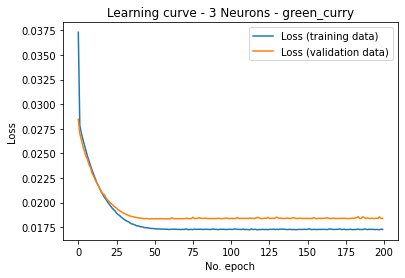

R-squared score of the train set for green_curry with 3 neurons:  -0.0486
Root mean squared error of the train set for green_curry with 3 neurons:  27.3901
Total number of parameters for green_curry with 3 neurons:  28
Akaike Information Criterion for green_curry with 3 neurons: 14415.5679
Corrected Akaike Information Criterion for green_curry with 3 neurons: 14416.3268
Generate a neural network model vegetable_curry - Using 3 Neurons
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 dense_4 (Dense)             (None, 3)                 12        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total param

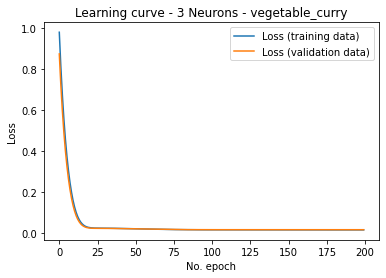

R-squared score of the train set for vegetable_curry with 3 neurons:  -2.2518
Root mean squared error of the train set for vegetable_curry with 3 neurons:  76.7491
Total number of parameters for vegetable_curry with 3 neurons:  28
Akaike Information Criterion for vegetable_curry with 3 neurons: 18885.2711
Corrected Akaike Information Criterion for vegetable_curry with 3 neurons: 18886.03


In [ ]:
modelNeurons = [3, 5, 7, 9]

models = {
    'green_curry': {
        'data': data_gc,
        'xtest': xtest_gc,
        'ytest': ytest_gc,
        'xtrain': xtrain_gc,
        'ytrain': ytrain_gc,
        'y_train_min': ytrain_min_gc,
        'y_train_max': ytrain_max_gc,
        'y_train_range': ytrain_range_gc,
        'y_test_min': ytest_min_gc,
        'y_test_max': ytest_max_gc,
        'y_test_range': ytest_range_gc,
    },
    'vegetable_curry': {
        'data': data_vc,
        'xtest': xtest_vc,
        'ytest': ytest_vc,
        'xtrain': xtrain_vc,
        'ytrain': ytrain_vc,
        'y_train_min': ytrain_min_vc,
        'y_train_max': ytrain_max_vc,
        'y_train_range': ytrain_range_vc,
        'y_test_min': ytest_min_vc,
        'y_test_max': ytest_max_vc,
        'y_test_range': ytest_range_vc,
    }
}

for name in models:
  for neurons in modelNeurons[:1]:
    models[name][neurons] = {}
    models = modelGeneration(models, name, neurons)
    models = trainModel(models, name, neurons, models[name]['xtrain'], models[name]['ytrain'])
    plotLearningCurve(models, name, neurons)
    models = predict(models, name, neurons)
    models = generateStats(models, name, neurons)


In [ ]:
# Ejemplo de como obtener la información de los modelos
# MODELS [ nombre ] [ neuronas ] [ variable ]
print(models['green_curry'][3]['aic_corrected'], models['vegetable_curry'][3]['aic_corrected'])

14416.326825617312 18886.03001964949


## **STEP 2**

Approach 1. Use the results of the product-level models in Step 1 to calculate a forecast for the curry category. In other words, the forecast of the curry category is equal to forecast with FA + forecast with FB.

### Approach 1
 Use the results of the product-level models in Step 1 to calculate a forecast for the curry 
category. In other words, the forecast of the curry category is equal to forecast with FA + forecast with 
FB. 

In [ ]:
# Read the CSV file, store it as a DataFrame and make sure it has no NaN values
df_vc_approach1 = pd.read_csv("green-thai-curry-sales.csv") # reading csv
df_gc_approach1 = pd.read_csv("vegetable-korma-curry-sales.csv") # reading csv

# Concatenate both DataFrames of STEP1
df_step1 = pd.concat([df_gc_output,df_vc_output]).groupby(['Date']).Sales.sum().reset_index()

# Concatenate both DataFrames for the following steps
df_approach1 = pd.concat([df_vc_approach1,df_gc_approach1]).groupby(['Date']).Sales.sum().reset_index()
df_approach1 

,Date,Sales
0,1/1/2011,574
1,1/1/2012,509
2,1/1/2013,520
3,1/1/2014,518
4,1/1/2015,561
...,...,...
3645,9/9/2016,467
3646,9/9/2017,487
3647,9/9/2018,552
3648,9/9/2019,539


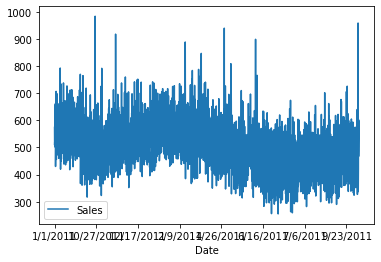

In [ ]:
# Display the data combined
df_approach1.plot(x='Date',y='Sales')
plt.show()

Outlier Indices:  [68, 107, 127, 148, 149, 153, 159, 188, 189, 197, 198, 319, 422, 487, 499, 501, 509, 732, 783, 818, 838, 839, 845, 858, 987, 998, 1030, 1049, 1077, 1078, 1099, 1119, 1130, 1148, 1176, 1235, 1236, 1295, 1296, 1356, 1363, 1366, 1499, 1563, 1567, 1570, 1679, 1707, 1727, 1749, 1798, 1799, 1839, 1885, 1919, 1964, 1969, 2035, 2104, 2114, 2229, 2259, 2334, 2342, 2349, 2410, 2429, 2559, 2601, 2681, 2687, 2688, 2759, 2789, 2855, 2930, 2987, 2989, 2997, 2999, 3049, 3069, 3109, 3119, 3128, 3159, 3164, 3180, 3181, 3239, 3270, 3281, 3287, 3321, 3412, 3499, 3639]


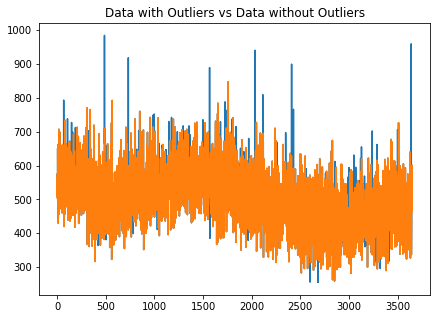

<Figure size 432x288 with 0 Axes>

In [ ]:
# Outlier detection for combined DataFrame
outlier_approach1 = hampel(df_approach1.Sales, window_size=5, n=3)
print("Outlier Indices: ", outlier_approach1)

# Outlier Imputation with rolling median for green curry
Outlier_imputation_approach1 = hampel(df_approach1.Sales, window_size=5, n=3, imputation=True) # If set to False, then the algorithm will be used for outlier detection. If set to True, then the algorithm will also imput the outliers with the rolling median.

# Plot Original Data vs. Outliers for green curry
df_approach1.Sales.plot(figsize=(7,5),title='Data with Outliers vs Data without Outliers')
Outlier_imputation_approach1.plot()
plt.figure()
plt.show()

In [ ]:
# Rename data to be handled
df_combined = Outlier_imputation_approach1.copy(deep=True)
df_combined.head()

0    574.0
1    509.0
2    520.0
3    518.0
4    561.0
Name: Sales, dtype: float64

In [ ]:
# Use 'r2_score' to analyze the forecast
r2_approach1 = r2_score(df_step1.Sales,df_approach1.Sales)
print('The R-squared score for the TrainSet:', round(r2_approach1,4))
# Use 'mean square error' to analyze the forecast
meanSE_approach1= mean_squared_error(df_step1.Sales, df_approach1.Sales)
meanSE_approach1= np.sqrt(meanSE_approach1)
print('Root mean squared error of the train set:', round(meanSE_approach1,4))

The R-squared score for the TrainSet: 0.5772
Root mean squared error of the train set: 57.404


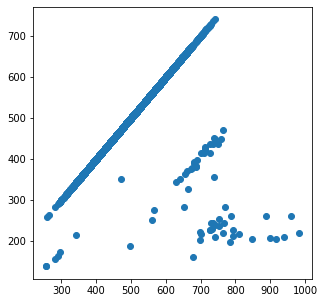

In [ ]:
# Display Original Data vs Predicted Data
plt.figure(figsize=(5,5))
plt.scatter(x = df_approach1.Sales, y = df_step1.Sales)

## **STEP 3**

Approach 2. Develop an aggregate neural network model for the curry category, using the total demand given by DA + DB as input data. Use 85% of the data for training and the rest for testing. Use a single hidden layer. Vary the number of neurons in the hidden layer using 3, 5, 7, and 9 neurons, to train four ANN models (for each architecture, record the Akaike Information Criteria).
* 3.1 Make a table that shows the Akaike Information Criteria for each number of neurons for the
aggregate model.
* 3.2 Report the best number of neurons in the hidden layer for the aggregate model

### Approach 2

In [ ]:
# Read the CSV file, store it as a DataFrame and make sure it has no NaN values
df_vc_approach1 = pd.read_csv("green-thai-curry-sales.csv") # reading csv
df_gc_approach1 = pd.read_csv("vegetable-korma-curry-sales.csv") # reading csv

# Concatenate both DataFrames for the following steps
df_approach1 = pd.concat([df_vc_approach1,df_gc_approach1]).groupby(['Date']).Sales.sum().reset_index()
df_approach1

,Date,Sales
0,1/1/2011,574
1,1/1/2012,509
2,1/1/2013,520
3,1/1/2014,518
4,1/1/2015,561
...,...,...
3645,9/9/2016,467
3646,9/9/2017,487
3647,9/9/2018,552
3648,9/9/2019,539


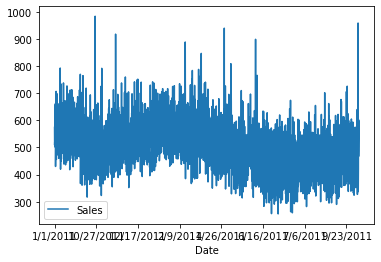

In [ ]:
# Display the data combined
df_approach1.plot(x='Date',y='Sales')
plt.show()

Outlier Indices:  [68, 107, 127, 148, 149, 153, 159, 188, 189, 197, 198, 319, 422, 487, 499, 501, 509, 732, 783, 818, 838, 839, 845, 858, 987, 998, 1030, 1049, 1077, 1078, 1099, 1119, 1130, 1148, 1176, 1235, 1236, 1295, 1296, 1356, 1363, 1366, 1499, 1563, 1567, 1570, 1679, 1707, 1727, 1749, 1798, 1799, 1839, 1885, 1919, 1964, 1969, 2035, 2104, 2114, 2229, 2259, 2334, 2342, 2349, 2410, 2429, 2559, 2601, 2681, 2687, 2688, 2759, 2789, 2855, 2930, 2987, 2989, 2997, 2999, 3049, 3069, 3109, 3119, 3128, 3159, 3164, 3180, 3181, 3239, 3270, 3281, 3287, 3321, 3412, 3499, 3639]


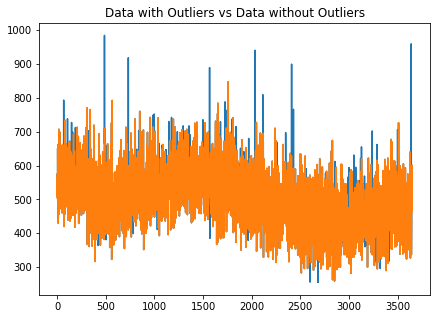

<Figure size 432x288 with 0 Axes>

In [ ]:
# Outlier detection for combined DataFrame
outlier_approach1 = hampel(df_approach1.Sales, window_size=5, n=3)
print("Outlier Indices: ", outlier_approach1)

# Outlier Imputation with rolling median for green curry
Outlier_imputation_approach1 = hampel(df_approach1.Sales, window_size=5, n=3, imputation=True) # If set to False, then the algorithm will be used for outlier detection. If set to True, then the algorithm will also imput the outliers with the rolling median.

# Plot Original Data vs. Outliers for green curry
df_approach1.Sales.plot(figsize=(7,5),title='Data with Outliers vs Data without Outliers')
Outlier_imputation_approach1.plot()
plt.figure()
plt.show()

In [ ]:
# Rename data to be handled
df_combined = Outlier_imputation_approach1.copy(deep=True)
df_combined.head()

0    574.0
1    509.0
2    520.0
3    518.0
4    561.0
Name: Sales, dtype: float64

### **3 Neurons** 

TypeError: ignored

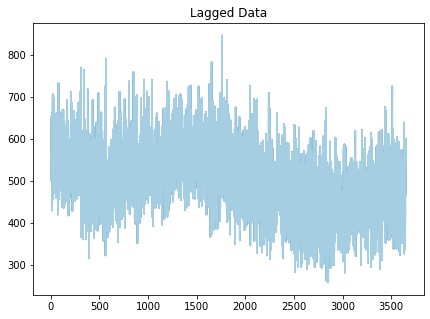

<Figure size 432x288 with 0 Axes>

In [ ]:
#Initialize the index at 1
df_combined.index = df_combined.index + 1 

# Lag the DataFrame
df_combined_lag = pd.concat([df_combined.shift(1), df_combined.shift(2), df_combined.shift(3), df_combined], axis=1)
df_combined_lag.columns = ['x1','x2', 'x3', 'y']
df_combined_lag = df_combined.iloc[4:,]
df_combined_lag.head()

# Plot data without Outliers and the lagged Data
df_combined.plot(figsize=(7,5),title='Data without Outliers')
df_combined_lag.plot(colormap='Paired',figsize=(7,5),title='Lagged Data')
plt.figure().show()


# Pick 85% of the data but keeps the original sequence (R)
train_combined = df_combined_lag[:int(data_gc.shape[0]*0.85)]
test_combined = df_combined_lag[int(data_gc.shape[0]*0.85):]

# Clean data in case of missing data
data_combined = df_combined_lag.dropna()
train_combined = train_combined.dropna()
test_combined = test_combined.dropna()


# Calculate parameter for scaling back the outcome variable, both for the prediction and the actual values
ytrain_min_combined = float(train_combined.min()['y'])
ytrain_max_combined = float(train_combined.max()['y'])
ytrain_range_combined = ytrain_max_combined - ytrain_min_combined

ytest_min_combined = float(test_combined.min()['y'])
ytest_max_combined = float(test_combined.max()['y'])
ytest_range_combined = ytest_max_combined - ytest_min_combined


# Normalize the data frame
def scale(data):
    scaled_data = data.copy()
    for column in data.columns: 
      scaled_data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    return scaled_data

# Scale back the data frame
def scale_back(data, data_min, data_range):
    data_ = data.copy()
    data_.head()
    for column in data_.columns: 
        data_[column] = (data_range) * data_[column] + data_min
    return data_

# Normalize the train data in the range of 0-1
train_ = scale(train_combined)

# Normalize the test data in the range of 0-1
test_ = scale(test_combined)
test_

# Separate the input (x) and output (y)
n_combined= train_.columns                                # Column labels
xtrain_combined = train_.filter(items = ['x1','x2','x3'])  # Input of the training set
ytrain_combined = train_.filter(items = ['y'])             # Output of the training set

xtest_combined = test_.filter(items = ['x1','x2','x3'])    # Input of the test set
ytest_combined = test_.filter(items = ['y'])               # Output of the test set

ytest_combined.head()

In [ ]:
# Train a neural network model - Using 3 Neurons
# https://www.tensorflow.org/api_docs/python/tf/keras/activations
print("Train a neural network model - Using 3 Neurons")
model_3neurons_combined = Sequential()

# First add a layer with 3 neurons for 3 input variables (3 lags) and the RELU activation function
model_3neurons_combined.add(Dense(3, input_dim=3, activation='relu'))

# Then add a hidden layer with n neurons and the sigmoid activation function
model_3neurons_combined.add(Dense(3, activation='sigmoid'))

# Then add the output layer with 1 neuron and a linear activation function
model_3neurons_combined.add(Dense(1))


model_3neurons_combined.summary()
print(model_3neurons_combined.count_params())
opt_3neurons_combined = tf.optimizers.Adam(learning_rate=0.0005)
print("")
print("Generating model ...")

# Fix random seed for reproducibility
seed = 1

Train a neural network model - Using 3 Neurons
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 3)                 12        
                                                                 
 dense_40 (Dense)            (None, 3)                 12        
                                                                 
 dense_41 (Dense)            (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
28

Generating model ...


In [ ]:
xtrain_for_parameter_fitting_3neurons_combined, x_validation_3neurons_combined, ytrain_for_parameter_fitting_3neurons_combined, y_validation_3neurons_combined = train_test_split(x_train_combined, ytrain_combined, test_size=0.3, random_state=seed)
model_3neurons_combined.compile(loss='mse', optimizer=opt_3neurons_combined, metrics=['mean_squared_error'])
history_3neurons_combined = model_3neurons_combined.fit(x=xtrain_for_parameter_fitting_3neurons_combined,y=ytrain_for_parameter_fitting_3neurons_combined, epochs=200, validation_data=(x_validation_3neurons_combined,y_validation_3neurons_combined), verbose=0)
print("Model generation completed - 3 Neurons")

NameError: ignored

In [ ]:
loss_3neurons_combined = history_3neurons_combined.history['loss']
val_loss_3neurons_combined = history_3neurons_combined.history['val_loss']

print("Final loss value in training set: ", loss_3neurons_combined[-1])
print("Final loss value in validation set: ", val_loss_3neurons_combined[-1])

# Plot learning curve
plt.plot(history_3neurons_combined.history['loss'], label='Loss (training data)')
plt.plot(history_3neurons_combined.history['val_loss'], label='Loss (validation data)')
plt.title('Learning curve - 3 Neurons - Green curry')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

NameError: ignored

In [ ]:
# Use the model to calculate predictions for the train set
y_pred_3neurons_gc = model_3neurons_gc.predict(xtest_gc)
y_pred_df_3neurons_gc = pd.DataFrame(y_pred_3neurons_gc)
y_pred_df_3neurons_gc.columns =['y'] 

# Scale back the predictions and original values
y_pred_rescaled_3neurons_gc = scale_back(pd.DataFrame(y_pred_3neurons_gc), ytrain_min_gc, ytrain_range_gc)
y_pred_rescaled_3neurons_gc.columns =['y'] 
y_train_rescaled_3neurons_gc = scale_back(pd.DataFrame(ytest_gc), ytrain_min_gc, ytrain_range_gc)
y_train_rescaled_3neurons_gc.head()

,y
3104,190.742138
3105,186.339623
3106,137.911950
3107,164.327044
3108,142.314465


In [ ]:
# r-squared
r2_squared_3neurons_gc = r2_score(y_train_rescaled_3neurons_gc, y_pred_rescaled_3neurons_gc)
print('R-squared score of the train set for green curry:', round(r2_squared_3neurons_gc,4))

# mean squared error
mse_3neurons_gc = mean_squared_error(y_train_rescaled_3neurons_gc, y_pred_rescaled_3neurons_gc)
rmse_3neurons_gc = np.sqrt(mse_3neurons_gc)
print('Root mean squared error of the train set for green curry:', round(rmse_3neurons_gc, 4))

# AIC
# trainable_weights includes neuron weights and biases
param_num_3neurons_gc = model_3neurons_gc.count_params()
print("Total number of parameters for green curry: ", param_num_3neurons_gc)
no_data_points_3neurons_gc = xtrain_for_parameter_fitting_3neurons_gc.shape[0]
aic_3neurons_gc = no_data_points_3neurons_gc * np.log(mse_3neurons_gc) + 2 * param_num_3neurons_gc
print("Akaike Information Criterion for green curry:", round(aic_3neurons_gc, 4))

# Corrected AIC
aic_corrected_3neurons_gc = aic_3neurons_gc + \
                2 * param_num_3neurons_gc*(param_num_3neurons_gc+1)/(no_data_points_3neurons_gc - param_num_3neurons_gc -1)
print("Corrected Akaike Information Criterion for green curry:", round(aic_corrected_3neurons_gc, 4))

R-squared score of the train set for green curry: 0.2442
Root mean squared error of the train set for green curry: 25.594
Total number of parameters for green curry:  28
Akaike Information Criterion for green curry: 14121.3567
Corrected Akaike Information Criterion for green curry: 14122.1156


## **STEP 3 - Try 2**

In [ ]:
# Read the CSV file, store it as a DataFrame and make sure it has no NaN values
# Vegetable Curry
url_vc='https://drive.google.com/file/d/1Yd4OcWul48u2RLakt3CfmFAs7hrSSVCE/view?usp=sharing'
path_vc ='https://drive.google.com/uc?id=' + url_vc.split('/')[-2]
df_vc = pd.read_csv(path_vc)
print(df_vc.head(3))

# Green Curry
url_gc='https://drive.google.com/file/d/1YXz_BBT83XPFmQgCoIAuY4MCCsz3ohhj/view?usp=sharing'
path_gc ='https://drive.google.com/uc?id=' + url_gc.split('/')[-2]
df_gc = pd.read_csv(path_gc)
print(df_gc.head(3))

# Make sure that there are no NaN values present
print("\n")
print(f"Vegetable Curry")
print(df_vc.info())
print("\n")
print(f"Green Curry")
print(df_vc.info())

## **STEP 4**
Use scatter plots to compare predicted against actual values for approaches 1 and 2.

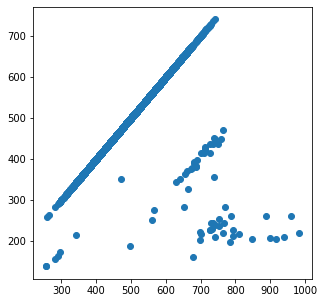

In [ ]:
# Display Original Data vs Predicted Data
plt.figure(figsize=(5,5))
plt.scatter(x = df_approach1.Sales, y = df_step1.Sales)

## **STEP 5**
Report the precision of approaches 1 and 2 in terms of Root Mean Squared Error and determination coefficient r 2.

## **STEP 6**

Write a paper in which you briefly explain: data understanding, data preparation, modeling, and evaluation steps according to the *CRISP* methodology. Include a table listing the activities carried out by each team member. Limit the length of the paper to a maximum of four pages. Include an Excel or Python
file with the calculations of Step 5. Also, include the Jupyter Notebooks that you used to generate the
models.

# **GREEN THAI CURRY SALES**

# **NOTE**

Remember that the data preparation requires the identification, removal, and replacement of outliers. If such a preparation is needed document the approach that you followed. The following references provide information for the detection and processing of outliers:
* Hampel filter
> https://medium.com/wwblog/clean-up-your-time-series-data-with-a-hampel-filter-58b0bb3ebb04
* Outlier identification and replacement
> https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
* Outlier detection in Python
> https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce